# CFSB Coding Challenge
## Question 1a.
### a. Using a brute-force search, find all 4 consecutive 3-digit integers that are like this.

In [8]:
wholeStack=[]  #This has all the numbers which satisfy the condition
currentStack=[]  #This is the current stack which satisfy the condition
Sum=0
for i in range(100,1000):
    
    num=i
    #loop to get the sum of the digits
    while num>0: 
        remainder=num % 10
        Sum+=remainder
        num=num//10
    
    #Check if the number is a multiple of the sume of its digits
    if i%Sum==0:
        currentStack.append(i)
        if len(currentStack)==4:
            wholeStack.append(currentStack)
    else:
        currentStack=[]
    Sum=0
wholeStack

[[510, 511, 512, 513]]

##  1b.
### Are there 17 consecutive 3-digit integers, such that they cannot be divided by the sum of their digits? 18?
### There are 17.  


In [9]:
wholeStack=[]  #This has all the numbers which satisfy the condition
currentStack=[]  #This is the current stack which satisfy the condition
Sum=0
for i in range(100,1000):
    
    num=i
    #loop to get the sum of the digits
    while num>0: 
        remainder=num % 10
        Sum+=remainder
        num=num//10
    
    #Check if the number is a multiple of the sume of its digits
    if i%Sum==0:
        currentStack.append(i)
        if len(currentStack)==2:
            wholeStack.append(currentStack)
    else:
        currentStack=[]
    Sum=0
len(wholeStack)

17

##  1c.
###  By using Memoization and Dynamic Programming.


Download the phoneme dataset (CSV) from
https://web.stanford.edu/~hastie/ElemStatLearn/datasets/phoneme.data.
The dataset is [4509 x259] and contains frequency measurements for five (5) phonemes
sampled at 16 kHz for 256 measurements per observation. Predictor features are labeled &quot;x.1&quot; -
&quot;x.256&quot; and the response is labeled “g”, the phoneme. The “speaker” column contains a unique
identifier for each the speaker used to generate the observed data – ignore this field.
Full dataset information is available in
https://web.stanford.edu/~hastie/ElemStatLearn/datasets/phoneme.info.txt.
a. Perform a quick exploratory analysis with summary statistics and plots.
b. Implement an LDA classification model of {g ~ x.1 + x.2 + … + x.256} for the “g” response
using cross validation or other sampling methods if deemed necessary.
i. Print model performance statistics, generating plots as necessary and write a
quick narrative summarizing results.
ii. What are some considerations that should be made before implementing LDA?
Does your exploratory analysis suggest that this is a good modeling technique to
use for this data?

## 2a. Perform a quick exploratory analysis with summary statistics and plots.

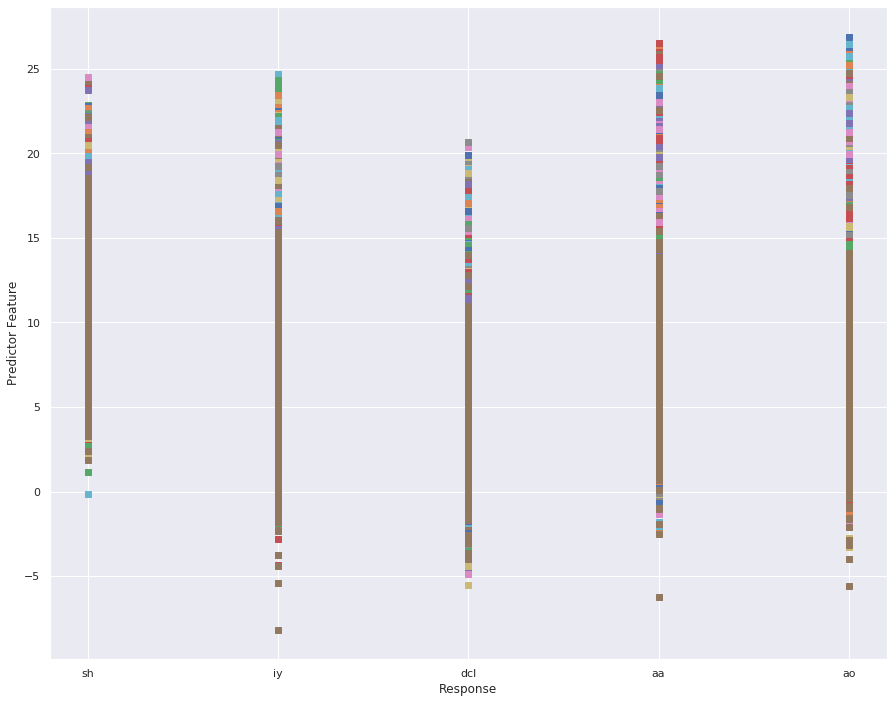

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import re

from sklearn.datasets import load_wine
np.set_printoptions(precision=4)
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

fig=plt.figure(figsize=(15,12))


df = pd.read_csv('./Files/phoneme.data')
#df2 = pd.read_csv('./Files/phoneme.info.txt')
df
predictFeature = [col for col in df if col.startswith('x.')]
# predictorFeature = df.columns.str.startswith("x.")
#type(df)
predictFeature
df[predictFeature]
df['g']

plt.plot(df['g'], df[predictFeature],'s')
#plt.plot(df['g'], df[predictFeature],'o')
# plt.legend(["Predictor Features","Response"])
plt.xlabel('Response')
plt.ylabel('Predictor Feature')

plt.show()

# x = pd.DataFrame(df['g'])

# y = pd.DataFrame(df[predictFeature])
# x.head(10)

#print(y)

# df.plot(x=df[])
# df.to_csv('data.csv')
# df.to_json('data2.json')


## 2b. Implement an LDA classification model of {g ~ x.1 + x.2 + … + x.256} for the “g” response using cross validation or other sampling methods if deemed necessary.

In [ ]:
#df[predictFeature].info()

#df
df.plot(x='g',y=predictFeature,kind='bar')
#df.plot(x="g", y=predictFeature, kind="bar", ax=ax, color="C2")
plt.show()

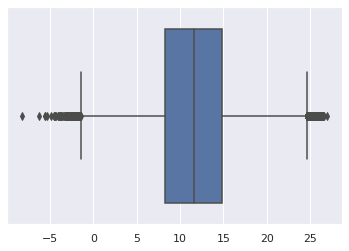

In [8]:
sns.boxplot(x=df[predictFeature])

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(df[predictFeature], df['g'])

In [11]:
lda.explained_variance_ratio_

array([0.5968, 0.2763, 0.1118, 0.0151])

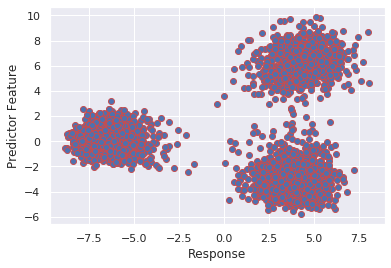

In [17]:
plt.xlabel('Response')
plt.ylabel('Predictor Feature')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    
    cmap='rainbow',
    alpha=1,
    edgecolors='r'
)